In [1]:
import re
import nltk
import random
import pandas as pd
from urllib import request
from nltk import pos_tag
from nltk.corpus import gutenberg, stopwords, wordnet
from nltk.tokenize import regexp_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from wordcloud import wordcloud
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.text import TSNEVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import xgboost as xgb

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
nltk.download('stopwords')
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('omw-1.4') 
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DEBI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\DEBI\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DEBI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DEBI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DEBI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DEBI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
pinocchio = "https://www.gutenberg.org/files/500/500-0.txt"
pan = "https://www.gutenberg.org/files/16/16-0.txt"
oz = "https://www.gutenberg.org/files/55/55-0.txt"
alice = "https://www.gutenberg.org/files/11/11-0.txt"
gulliver = "https://www.gutenberg.org/files/829/829-0.txt"
books_list = [pinocchio , pan , oz , alice , gulliver]
author_list = ["Carlo Collodi", "James M. Barrie", "L. Frank Baum", "Lewis Carroll", "Jonathan Swift"]

In [5]:
def get_word_net_pos(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("N"):
        return wordnet.NOUN
    elif tag.startswith("R"):
        return wordnet.ADV
    else :
        return wordnet.NOUN

In [6]:
def read_book(url,name) :
    lemmatizer = WordNetLemmatizer()
    response = request.urlopen(url)
    lines = (response.read().decode('utf8')).lower()
    book = regexp_tokenize(lines,r'([a-zA-Z]{3,})[\,|\s|\.]')
    tokens = [token for token in book if token.lower() not in stop_words]
    books =[]
    for i in range(200) :
        start = random.randint(0 , len(tokens) - 100)
        books.append([' '.join(tokens[start: start + 100])])    
    df = pd.DataFrame(books, columns=["partitions"])
    for i in range(200):
        sent=""
        x = nltk.pos_tag((df.partitions[i]).split())
        for word,tag in x:
            lemma = lemmatizer.lemmatize(word,pos=get_word_net_pos(tag))
            sent += lemma+" "
            df.partitions[i] = sent
    df["author"] = name
    return df

In [7]:
def five_books(list_of_urls,author_list) :
    df_full = pd.DataFrame()
    for i,j in enumerate(list_of_urls) :
        df = read_book(j,author_list[i])
        df_full = df_full.append(df , ignore_index= True)
    return df_full    

In [8]:
df = five_books(books_list,author_list)

C:\Users\DEBI\AppData\Local\Temp\ipykernel_10448\1836496175.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_full = df_full.append(df , ignore_index= True)
C:\Users\DEBI\AppData\Local\Temp\ipykernel_10448\1836496175.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_full = df_full.append(df , ignore_index= True)
C:\Users\DEBI\AppData\Local\Temp\ipykernel_10448\1836496175.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_full = df_full.append(df , ignore_index= True)
C:\Users\DEBI\AppData\Local\Temp\ipykernel_10448\1836496175.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_full = df_full.append(df , ignore_index= Tr

In [9]:
df.author.value_counts()

Carlo Collodi      200
James M. Barrie    200
L. Frank Baum      200
Lewis Carroll      200
Jonathan Swift     200
Name: author, dtype: int64

In [10]:
def draw_chart(all_books,author_list):
    for index in author_list:
        temp=all_books[all_books["author"]==index]
        wc = wordcloud.WordCloud(background_color='black', max_words=200, 
                             max_font_size=35)
        wc = wc.generate(str(temp))
        fig = plt.figure(num=1)
        plt.axis('off')
        plt.imshow(wc, cmap=None)
        plt.title(f'{index}')
        plt.show()

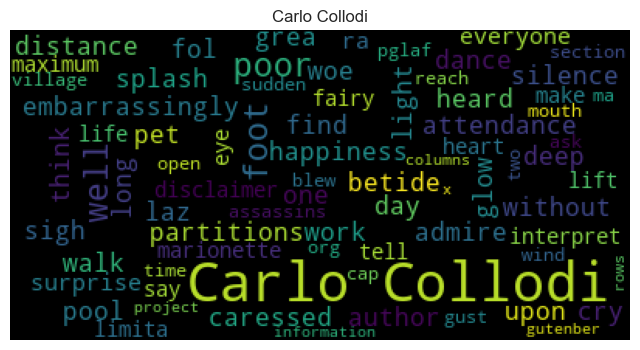

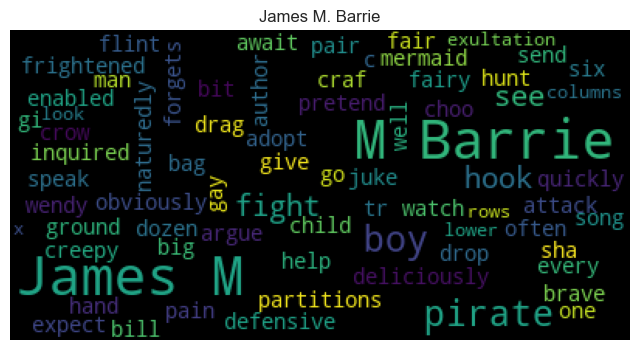

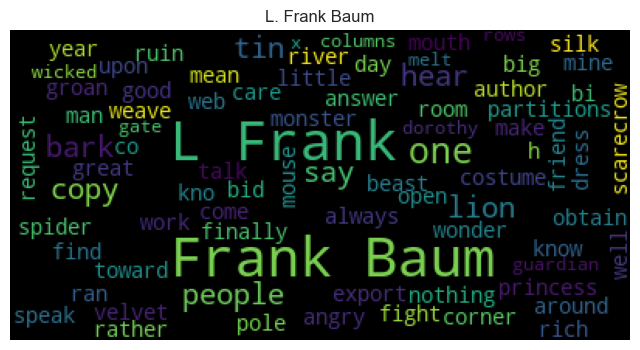

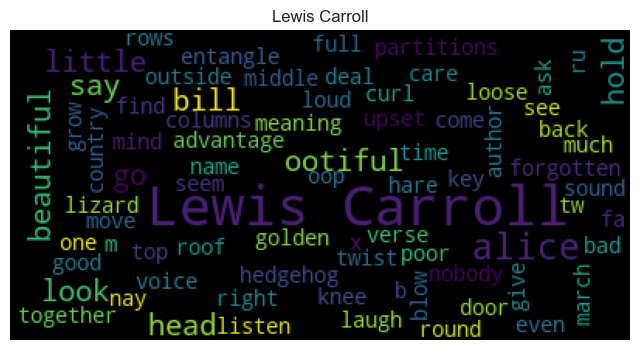

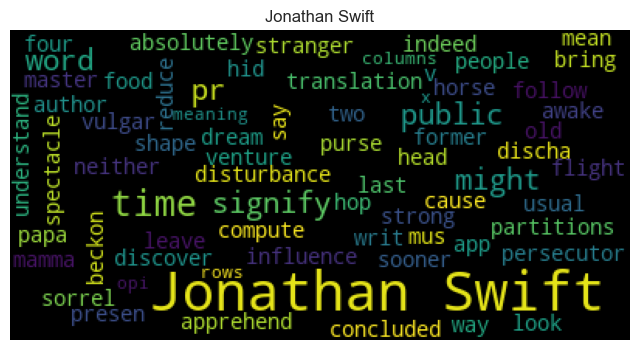

In [11]:
draw_chart(df,author_list)

In [12]:
df['char_count'] = df["partitions"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df.head()

,partitions,author,char_count
0,light glow distance walk foot splash pool grea...,Carlo Collodi,491
1,admire dance attendance upon pet caressed day ...,Carlo Collodi,493
2,foot poor poor embarrassingly long silence fol...,Carlo Collodi,506
3,one find happiness without work woe betide laz...,Carlo Collodi,513
4,heard cry deep sigh think surprise everyone ra...,Carlo Collodi,533


In [13]:
def draw_chart_histgram(all_books,author_list):    
    x, y = "char_count", "y"
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.suptitle(x, fontsize=12)
    
    for i in all_books["author"].unique():
        sns.distplot(all_books[all_books["author"]==i][x], hist=True, kde=False, 
                     bins=10, hist_kws={"alpha":0.8}, 
                     axlabel="histogram", ax=ax[0])
        sns.distplot(all_books[all_books["author"]==i][x], hist=False, kde=True, 
                     kde_kws={"shade":True}, axlabel="density",   
                     ax=ax[1])
    ax[0].grid(True)
    ax[0].legend(all_books["author"].unique())
    ax[1].grid(True)
    plt.show()

C:\Users\DEBI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEBI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\DEBI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

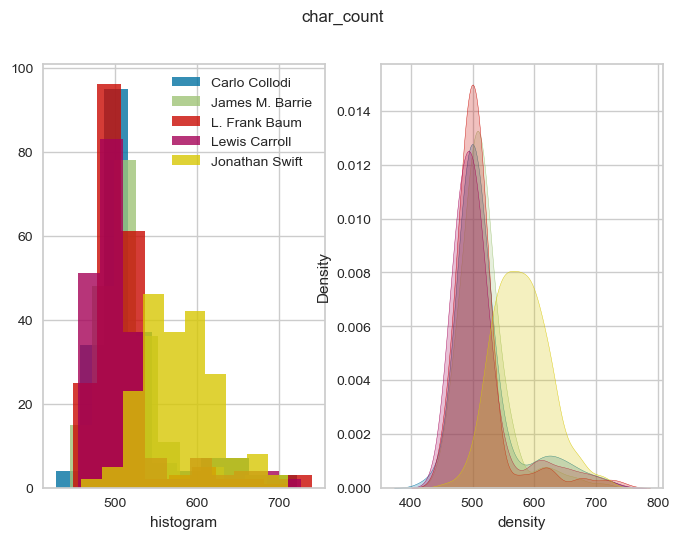

In [14]:
draw_chart_histgram(df,author_list)

In [15]:
def bow(df):
    vectorizer = CountVectorizer()
    bow_model = vectorizer.fit(df.partitions)
    X = bow_model.transform(df.partitions)
    df_bow = pd.DataFrame(X.toarray(),columns = bow_model.get_feature_names_out())
    print(df_bow)
    X_train, X_test, y_train, y_test = train_test_split(df_bow, Y, test_size = 0.20, random_state = 42)
    return X_train, X_test, y_train, y_test, df_bow

In [16]:
Y = df.author
Y

0       Carlo Collodi
1       Carlo Collodi
2       Carlo Collodi
3       Carlo Collodi
4       Carlo Collodi
            ...      
995    Jonathan Swift
996    Jonathan Swift
997    Jonathan Swift
998    Jonathan Swift
999    Jonathan Swift
Name: author, Length: 1000, dtype: object

     abandon  abate  abet  abhor  abide  ability  abject  ablaze  able  \
0          0      0     0      0      0        0       0       0     1   
1          0      0     0      0      0        0       0       0     0   
2          0      0     0      0      0        0       0       0     0   
3          0      0     0      0      0        0       0       0     0   
4          0      0     0      0      0        0       0       0     0   
..       ...    ...   ...    ...    ...      ...     ...     ...   ...   
995        0      0     0      0      0        0       0       0     0   
996        0      1     0      0      0        0       0       0     0   
997        0      0     0      0      0        0       0       0     0   
998        0      0     0      0      0        0       0       0     0   
999        0      0     0      0      0        0       0       0     0   

     aboard  ...  yolk  yonder  young  youngster  youth  zeal  zealand  \
0         0  ...     0       0      0

C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*

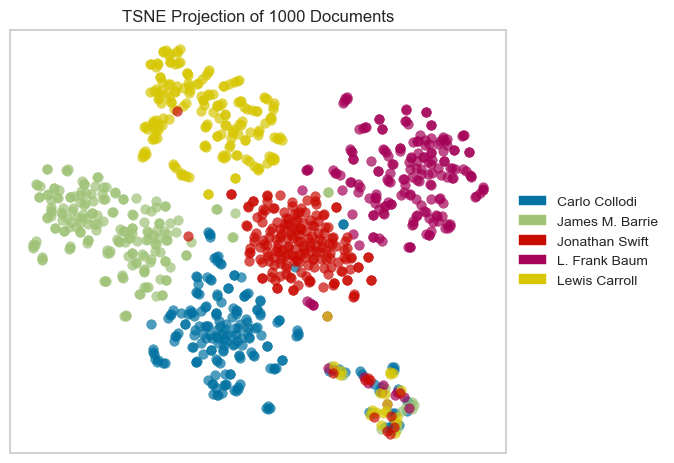

<AxesSubplot:title={'center':'TSNE Projection of 1000 Documents'}>

In [17]:
a = bow(df)
tsne = TSNEVisualizer()
tsne.fit(a[4],df["author"])
tsne.show()

<AxesSubplot:title={'center':'Top 20 words'}, xlabel='word'>

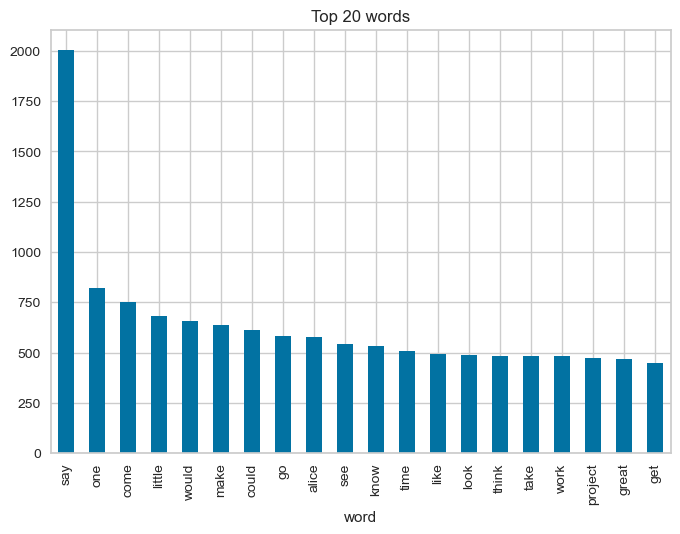

In [18]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1,1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['partitions'], 20)
#for word, freq in common_words:
    #print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df1.groupby('word').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 20 words')

In [19]:
def tf_idf(df):
    vectorizer = TfidfVectorizer()
    tf_idf_model = vectorizer.fit(df.partitions)
    tf_idf_out=tf_idf_model.transform(df.partitions)
    feature_names = tf_idf_model.get_feature_names_out()
    dense = tf_idf_out.todense()
    denselist = dense.tolist()
    df = pd.DataFrame(denselist, columns=feature_names)
    X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size = 0.20, random_state = 42)
    return X_train, X_test, y_train, y_test

In [20]:
def n_gram(df , n):
    count_vect = CountVectorizer(ngram_range=(n , n))
    ngram_vectors=count_vect.fit_transform(df.partitions)
    df = pd.DataFrame(ngram_vectors.toarray(),columns=count_vect.get_feature_names_out())
    X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size = 0.20, random_state = 42)

    return X_train, X_test, y_train, y_test

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.author = encoder.fit_transform(df.author)
Y = df.author
Y

0      0
1      0
2      0
3      0
4      0
      ..
995    2
996    2
997    2
998    2
999    2
Name: author, Length: 1000, dtype: int32

In [22]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow,hh = bow(df)
X_train_tf_idf, X_test_tf_idf, y_train_tf_idf, y_test_tf_idf = tf_idf(df)
X_train_n_gram, X_test_n_gram, y_train_n_gram, y_test_n_gram = n_gram(df,2)

     abandon  abate  abet  abhor  abide  ability  abject  ablaze  able  \
0          0      0     0      0      0        0       0       0     1   
1          0      0     0      0      0        0       0       0     0   
2          0      0     0      0      0        0       0       0     0   
3          0      0     0      0      0        0       0       0     0   
4          0      0     0      0      0        0       0       0     0   
..       ...    ...   ...    ...    ...      ...     ...     ...   ...   
995        0      0     0      0      0        0       0       0     0   
996        0      1     0      0      0        0       0       0     0   
997        0      0     0      0      0        0       0       0     0   
998        0      0     0      0      0        0       0       0     0   
999        0      0     0      0      0        0       0       0     0   

     aboard  ...  yolk  yonder  young  youngster  youth  zeal  zealand  \
0         0  ...     0       0      0

In [23]:
X_train_bow

,abandon,abate,abet,abhor,abide,ability,abject,ablaze,able,aboard,...,yolk,yonder,young,youngster,youth,zeal,zealand,zealous,zigzag,zip
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.model_selection import cross_val_score
def cross_validation(model, X, y):
    scoring = ['accuracy', 'f1']
    scores = cross_val_score(model, X, y, cv=2)
    return scores

In [25]:
def confusion_mx (y_test,y_pred,model_name):
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()


In [26]:
def model_fit(X_train, y_train, X_test, y_test,nb,model_name):
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    confusion_mx(y_test, y_pred,model_name)

In [27]:
def svm():
    svc = SVC(kernel="rbf")
    print(cross_validation(svc,X_train_bow,y_train_bow))
    print(cross_validation(svc,X_train_tf_idf,y_train_tf_idf))
    print(cross_validation(svc,X_train_n_gram,y_train_n_gram))
    model_fit(X_train_bow, y_train_bow, X_test_bow, y_test_bow, svc,"SVM BOW")
    model_fit(X_train_tf_idf,y_train_tf_idf, X_test_tf_idf,  y_test_tf_idf,svc,"SVM TF_IDF")
    model_fit(X_train_n_gram, y_train_n_gram, X_test_n_gram, y_test_n_gram,svc,"SVM N_GRAM")
  

[0.9425 0.925 ]
[0.95   0.9225]
[0.7025 0.75  ]


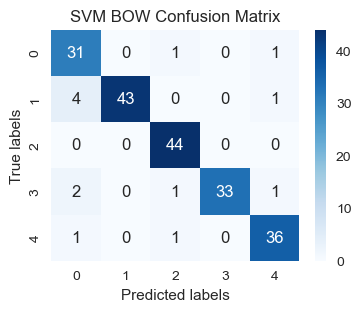

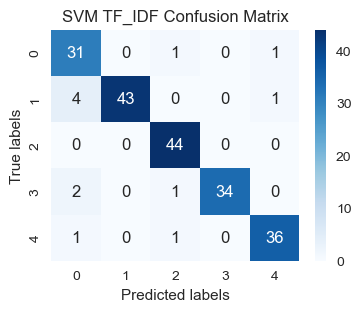

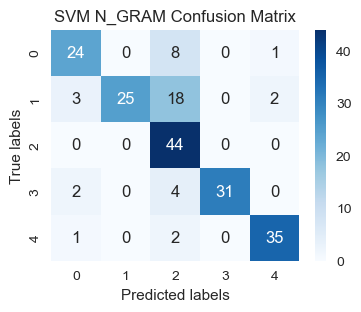

In [28]:
svm()

In [29]:
from sklearn.naive_bayes import MultinomialNB

def naive_bayes():
    nb = MultinomialNB()
    print(cross_validation(nb, X_train_bow, y_train_bow))
    print(cross_validation(nb,X_train_tf_idf,y_train_tf_idf))
    print(cross_validation(nb,X_train_n_gram,y_train_n_gram))
    model_fit(X_train_bow, y_train_bow,X_test_bow,y_test_bow,nb,"Naïve Bayes BOW")
    model_fit(X_train_tf_idf,y_train_tf_idf, X_test_tf_idf,  y_test_tf_idf,nb,"Naïve Bayes TF_IDF")
    model_fit(X_train_n_gram, y_train_n_gram, X_test_n_gram, y_test_n_gram,nb,"Naïve Bayes N_GRAM")

[0.955 0.935]
[0.955 0.915]
[0.9275 0.8975]


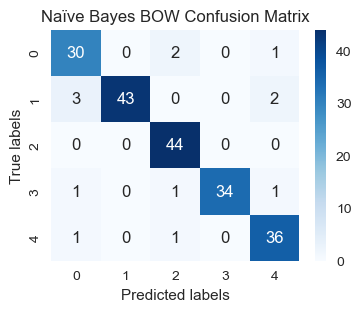

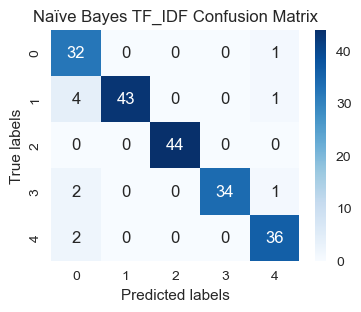

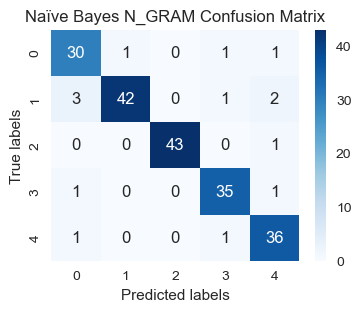

In [30]:
naive_bayes()

In [31]:
from sklearn.neighbors import KNeighborsClassifier

def knn():
    k = 5  # Set the value of k for KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    print(cross_validation(knn, X_train_bow, y_train_bow))
    print(cross_validation(knn,X_train_tf_idf,y_train_tf_idf))
    print(cross_validation(knn,X_train_n_gram,y_train_n_gram))
    model_fit(X_train_bow, y_train_bow,X_test_bow,y_test_bow,knn,"KNN BOW")
    model_fit(X_train_tf_idf,y_train_tf_idf, X_test_tf_idf,  y_test_tf_idf,knn,"KNN TF_IDF")
    model_fit(X_train_n_gram, y_train_n_gram, X_test_n_gram, y_test_n_gram,knn,"KNN N_GRAM")

C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

[0.915 0.91 ]


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

[0.93   0.9225]


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

[0.87  0.825]


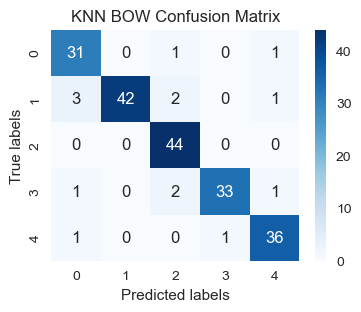

C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


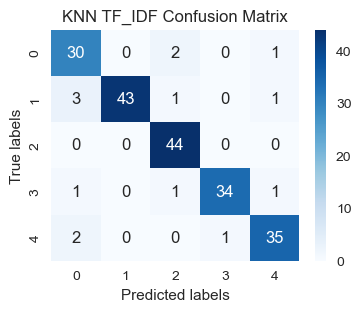

C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


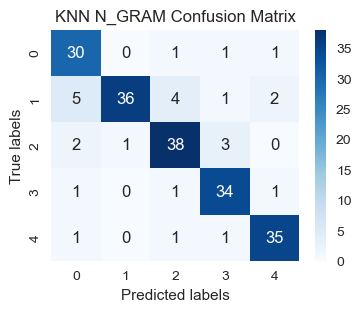

In [32]:
knn()

In [33]:
def RandomForest():
    Forest_model = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 42)
    print(cross_validation(Forest_model,X_train_bow,y_train_bow))
    print(cross_validation(Forest_model,X_train_tf_idf,y_train_tf_idf))
    print(cross_validation(Forest_model,X_train_n_gram,y_train_n_gram))
    model_fit(X_train_bow, y_train_bow,X_test_bow,y_test_bow,Forest_model,"Random Forest BOW")
    model_fit(X_train_tf_idf,y_train_tf_idf, X_test_tf_idf,  y_test_tf_idf,Forest_model,"Random Forest TF_IDF")
    model_fit(X_train_n_gram, y_train_n_gram, X_test_n_gram, y_test_n_gram,Forest_model,"Random Forest N_GRAM")

[0.9475 0.925 ]
[0.9425 0.9225]
[0.6325 0.585 ]


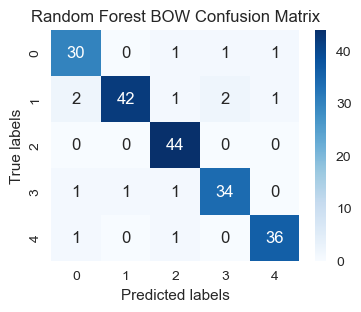

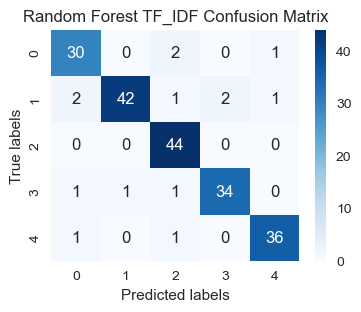

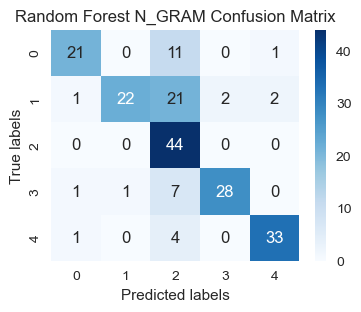

In [34]:
RandomForest()

In [35]:
def SGD():
    sgd = SGDClassifier(random_state=42)
    print(cross_validation(sgd,X_train_bow,y_train_bow))
    print(cross_validation(sgd,X_train_tf_idf,y_train_tf_idf))
    print(cross_validation(sgd,X_train_n_gram,y_train_n_gram))
    model_fit(X_train_bow, y_train_bow,X_test_bow,y_test_bow,sgd,"SGD BOW")
    model_fit(X_train_tf_idf,y_train_tf_idf, X_test_tf_idf,  y_test_tf_idf,sgd,"SGD TF_IDF")
    model_fit(X_train_n_gram, y_train_n_gram, X_test_n_gram, y_test_n_gram,sgd,"SGD N_GRAM")

[0.9425 0.9275]
[0.9425 0.935 ]
[0.915 0.885]


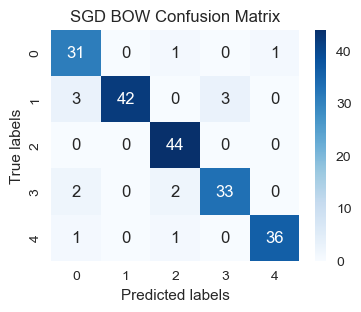

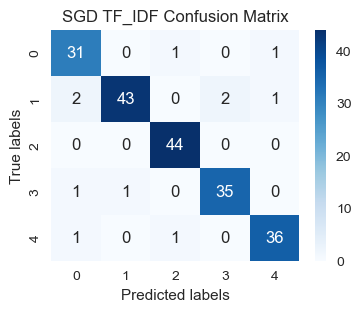

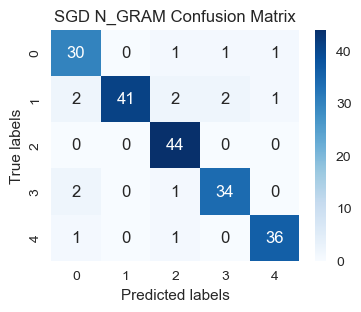

In [36]:
SGD()

In [37]:
def xgb_m():
    xgb_model = xgb.XGBClassifier(random_state=42)
    print(cross_validation(xgb_model,X_train_bow,y_train_bow))
    print(cross_validation(xgb_model,X_train_tf_idf,y_train_tf_idf))
    print(cross_validation(xgb_model,X_train_n_gram,y_train_n_gram))
    model_fit(X_train_bow, y_train_bow,X_test_bow,y_test_bow,xgb_model,"XGB BOW")
    model_fit(X_train_tf_idf,y_train_tf_idf, X_test_tf_idf,  y_test_tf_idf,xgb_model,"XGB TF_IDF")
    model_fit(X_train_n_gram, y_train_n_gram, X_test_n_gram, y_test_n_gram,xgb_model,"XGB N_GRAM")

In [ ]:
xgb_m() 

[0.925  0.9125]
[0.9125 0.905 ]
